Optimizing urban road traffic using AI - assignment

Termin: 22 czerwca 2025 23:59
Instrukcje
Download the dataset from https://drive.google.com/file/d/1m5xgNXp3vv5zzH4JHfE9983cLiSR3IPp/view

In the file, you have 105336 rows. In each row, the first 21 elements are offsets at 21 intersections in Warsaw (a part of the Ochota district), while the last element is the total waiting time at red lights for all cars during a simulation of 10 minutes of realistic traffic (it was calculated using the Traffic Simulation Framework tool). The offsets are times (in seconds) from the start of the simulation to the first transition (of a selected signal state at the given intersection) from the red signal state to the green signal state. The values of the offsets are integers from the set {0,1,2,...,119}. The total wait times at red signals are also integers.

Your task is to implement a pipeline for:

1) Reading the data.

2) Splitting the dataset into a training set (first 85336 rows) and a test set (last 20000 rows).

3) Preprocessing the data (e.g., you can normalize the inputs and outputs).

4) Training at least 1 machine learning model (e.g., a feed-forward neural network, XGBoost, or LightGBM) to predict the total wait time at red signals based on the 21 offsets.

5) Calculating the MAPE (Mean Absolute Percentage Error) of the trained model(s) on the test set and presenting the results.

6) Optimizing the hyperparameters of your model, if needed.

7) Presenting the results, e.g., you can visualize how the MAPE or loss function changes in iterations of training.



It should be possible to get a MAPE below 2%, but it may take some time and may require optimizing the parameters. 

The code should be prepared as a Jupyter notebook. If you need a GPU, you can use Google Colab.



Questions: send an email to pawel.gora@qaif.org

Submission: send the Jupyter notebook file with the code to pawel.gora@qaif.org by 22.06.2025.

In [1]:
!pip install pandas scikit-learn xgboost numpy

1) Reading the data.

In [2]:
# import pandas as pd
# df = pd.read_csv("ochota100k.csv")

In [1]:
import pandas as pd

file_id = "1m5xgNXp3vv5zzH4JHfE9983cLiSR3IPp"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
df = pd.read_csv(url)
print(df.head())

    81  14   58  108  83  60   82  61   64   94  ...   28   87   73   69   25  \
0   81  92   16   44  95  64  110  98   95  105  ...   42    5   40  105  118   
1   75  20   66  104  20  65   80  97    2   81  ...  119  115  118   64   68   
2   30  42   65  108  67  81   85  32   83   48  ...  107   79   44   90    6   
3  117  20   52   40  25  36   87  78   99   70  ...   92   21   34  102   37   
4   47  63  110   39  39  56  116  81  111   46  ...   63   98    3  101   54   

    7   77   95    5  49082  
0  48   40   62   45  51223  
1  46   45   43   18  51461  
2  25   46  102   62  45119  
3  46   11    9   66  50660  
4  14  109   79  111  49601  

[5 rows x 22 columns]


In [2]:
columns_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", 'time']
df.columns = columns_names
df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,time
0,81,92,16,44,95,64,110,98,95,105,...,42,5,40,105,118,48,40,62,45,51223
1,75,20,66,104,20,65,80,97,2,81,...,119,115,118,64,68,46,45,43,18,51461
2,30,42,65,108,67,81,85,32,83,48,...,107,79,44,90,6,25,46,102,62,45119
3,117,20,52,40,25,36,87,78,99,70,...,92,21,34,102,37,46,11,9,66,50660
4,47,63,110,39,39,56,116,81,111,46,...,63,98,3,101,54,14,109,79,111,49601


2) Splitting the dataset into a training set (first 85336 rows) and a test set (last 20000 rows).

In [3]:
train_df = df.iloc[:85336]
test_df = df.iloc[-20000:]

3. Preprocessing the data (e.g., you can normalize the inputs and outputs).

In [4]:
X_train=train_df.drop(['time'], axis=1)
y_train=train_df['time']
X_test=test_df.drop(['time'], axis=1)
y_test=test_df['time']

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

4) Training at least 1 machine learning model (e.g., a feed-forward neural network, XGBoost, or LightGBM) to predict the total wait time at red signals based on the 21 offsets.

In [6]:
import xgboost
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [7]:
y_pred = model.predict(X_test)

In [8]:
len(y_test) == len(y_pred)

True

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² score: {r2:.2f}")

RMSE: 5015446.94
MAE: 1795.06
R² score: 0.52


5) Calculating the MAPE (Mean Absolute Percentage Error) of the trained model(s) on the test set and presenting the results.

In [10]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

MAPE: 3.68%


In [11]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred) * 100, "%")

MAE: 1795.061112109375
RMSE: 5015446.935536348
R²: 0.520799800765399
MAPE: 3.6777711858228432 %


6) Optimizing the hyperparameters of your model, if needed.

In [12]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best params (XGB):", grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params (XGB): {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


In [13]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error


dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mape',  # lub 'mape', ale tylko w nowszych wersjach
    'learning_rate': 0.2,
    'max_depth': 7,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'seed': 42
}

evals = [(dtrain, 'train'), (dvalid, 'valid')]
evals_result = {}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=20,
    evals_result=evals_result,
    verbose_eval=10
)

[0]	train-mape:0.05250	valid-mape:0.05246
[10]	train-mape:0.04506	valid-mape:0.04579
[20]	train-mape:0.03907	valid-mape:0.04049
[30]	train-mape:0.03340	valid-mape:0.03542
[40]	train-mape:0.03025	valid-mape:0.03289
[50]	train-mape:0.02701	valid-mape:0.03008
[60]	train-mape:0.02519	valid-mape:0.02862
[70]	train-mape:0.02352	valid-mape:0.02729
[80]	train-mape:0.02176	valid-mape:0.02579
[90]	train-mape:0.02047	valid-mape:0.02477
[100]	train-mape:0.01947	valid-mape:0.02405
[110]	train-mape:0.01871	valid-mape:0.02354
[120]	train-mape:0.01791	valid-mape:0.02295
[130]	train-mape:0.01717	valid-mape:0.02239
[140]	train-mape:0.01676	valid-mape:0.02220
[150]	train-mape:0.01628	valid-mape:0.02193
[160]	train-mape:0.01585	valid-mape:0.02172
[170]	train-mape:0.01553	valid-mape:0.02161
[180]	train-mape:0.01519	valid-mape:0.02144
[190]	train-mape:0.01488	valid-mape:0.02134
[199]	train-mape:0.01447	valid-mape:0.02107


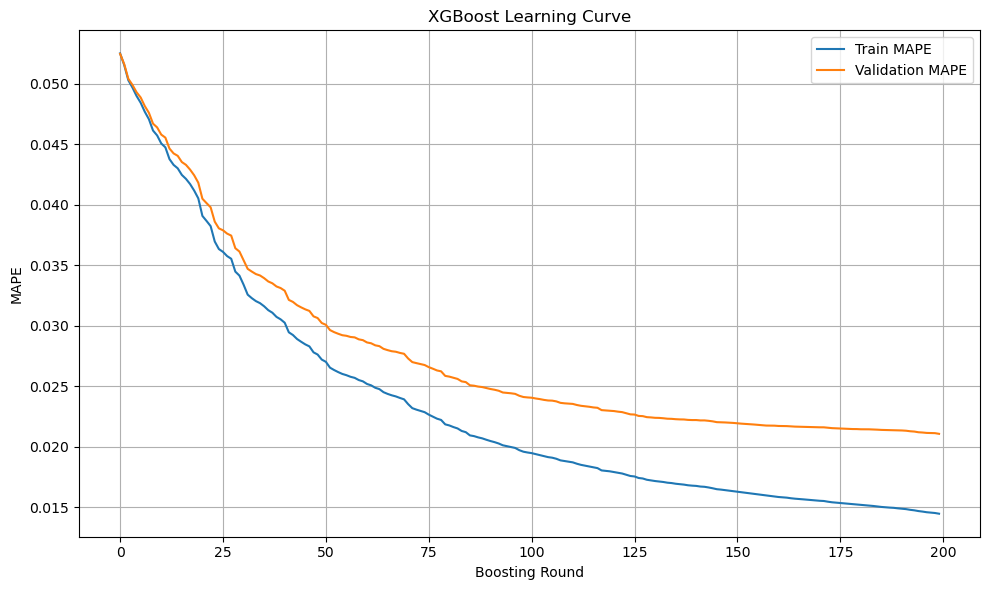

In [14]:
train_mae = evals_result['train']['mape']
valid_mae = evals_result['valid']['mape']

plt.figure(figsize=(10, 6))
plt.plot(train_mae, label='Train MAPE')
plt.plot(valid_mae, label='Validation MAPE')
plt.xlabel('Boosting Round')
plt.ylabel('MAPE')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
y_pred = model.predict(dvalid)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

MAPE: 2.11%


In [20]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
import numpy as np

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'max_depth': [6, 7, 8],
    'learning_rate': [0.07, 0.15, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [200, 300, 400],
    'reg_alpha': [0.02,.01],
    'reg_lambda': [1, 2],
    'gamma': [0.1, 0.3]
}

def mape_scorer(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

scorer = make_scorer(mape_scorer, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MAPE:", -grid_search.best_score_)


Fitting 3 folds for each of 1944 candidates, totalling 5832 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1, 'subsample': 1.0}
Best MAPE: 0.02049377631548012


In [24]:
print(f"MAPE: {-grid_search.best_score_* 100:.2f}%")

MAPE: 2.05%


7) Presenting the results, e.g., you can visualize how the MAPE or loss function changes in iterations of training.

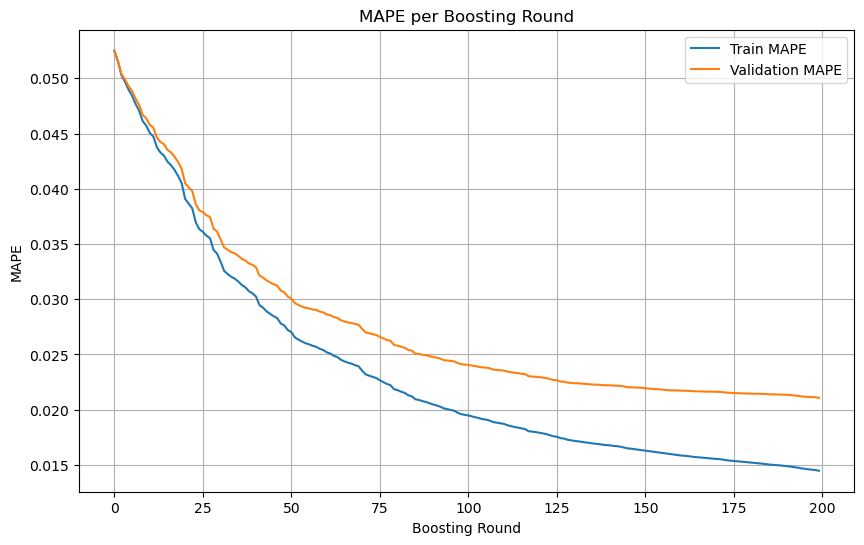

In [26]:
import matplotlib.pyplot as plt

train_mape = evals_result['train']['mape']
valid_mape = evals_result['valid']['mape']

plt.figure(figsize=(10, 6))
plt.plot(train_mape, label='Train MAPE')
plt.plot(valid_mape, label='Validation MAPE')
plt.xlabel("Boosting Round")
plt.ylabel("MAPE")
plt.title("MAPE per Boosting Round")
plt.legend()
plt.grid(True)
plt.show()


**Wnioski:**
Przy zastosowanym modelu XGBoost nie udało się zejść poniżej MAPE 2%. Po optymalizacji hyperparametrów w najlepszej próbie udało się osiągnąć 2,05% dla danych testowych.